In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load dataset
df = pd.read_csv("games.csv")

# check the first rows
df.head()

,name,platform,release_date,summary,metascore,userscore
0,! SPACE ACCIDENT !,PC,"February 10, 2022",The year is 2119. A turning point has begun in...,tbd,tbd
1,! That Bastard Is Trying To Steal Our Gold !,PC,"May 11, 2014",It's a fun puzzle game where you need to steal...,tbd,3.4
2,!4RC4N01D!,PC,"January 12, 2018",Hardcore arkanoid in the spirit of old games f...,tbd,4.0
3,!4RC4N01D! 2: Retro Edition,PC,"February 6, 2018","Everyone dreams of returning 2007, but no one ...",tbd,3.8
4,!4RC4N01D! 3: Cold Space,PC,"March 8, 2018",!4RC4N01D! returns! This time we have an accid...,tbd,3.0


In [30]:
df.tail()

,name,platform,release_date,summary,metascore,userscore
142412,{Undefined},PC,"August 20, 2021","A sandbox survival game, set on life-sized vox...",tbd,tbd
142413,~ Daydream ~,PC,"May 26, 2022",~Daydream~is an action 2D platform jumping gam...,tbd,tbd
142414,~Azur Ring~virgin and slave's phylacteries,PC,"July 17, 2020",New DIABLO-Like adventure game. Legendary gear...,tbd,tbd
142415,~Gigantify~,PC,"January 23, 2022",This is a small Puzzle Platformer where you dy...,tbd,tbd
142416,~necromancy~Emily's Escape,PC,"December 21, 2018",The necromancer employs forbidden spells and p...,tbd,tbd


In [33]:
df.shape

(142417, 6)

In [35]:
# Replace 'tbd' with NaN in 'metascore' and 'userscore'
df['metascore'] = df['metascore'].replace('tbd', pd.NA)
df['userscore'] = df['userscore'].replace('tbd', pd.NA)

In [37]:
# Converting release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], format='%B %d, %Y')

In [39]:
#check for duplicates
df.duplicated().sum()

7

In [41]:
#Confirming duplicates
df[df.duplicated(keep=False)]

,name,platform,release_date,summary,metascore,userscore
4525,Aikagi,PC,2021-11-17,"During the last winter of his student days, Su...",<NA>,<NA>
4526,Aikagi,PC,2021-11-17,"During the last winter of his student days, Su...",<NA>,<NA>
11044,BOT.vinnik Chess: Winning Patterns,PC,2020-09-30,The players submitted to my training showed si...,<NA>,<NA>
11045,BOT.vinnik Chess: Winning Patterns,PC,2020-09-30,The players submitted to my training showed si...,<NA>,<NA>
14698,Bit.Trip Core,PC,2012-10-02,Bit.Trip Core continues the Bit.Trip saga in t...,<NA>,<NA>
14699,Bit.Trip Core,PC,2012-10-02,Bit.Trip Core continues the Bit.Trip saga in t...,<NA>,<NA>
23035,"Ciconia When They Cry - Phase 1: For You, the ...",PC,2019-10-03,This is the first chapter in newest entry When...,<NA>,<NA>
23036,"Ciconia When They Cry - Phase 1: For You, the ...",PC,2019-10-03,This is the first chapter in newest entry When...,<NA>,<NA>
62565,Journey's End: Realms of High Adventure,PC,2001-01-25,NaN,<NA>,<NA>
62566,Journey's End: Realms of High Adventure,PC,2001-01-25,NaN,<NA>,<NA>


In [43]:
#Handling the duplicates
df = df.drop_duplicates()

In [45]:
#Double checking duplicates
df.duplicated().sum()

0

In [47]:
#Converting columns to numeric
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')
df['userscore'] = pd.to_numeric(df['userscore'], errors='coerce')

In [51]:
#Checking for missing values
df.isnull().sum()

name                 0
platform             0
release_date         0
summary          17712
metascore       112148
userscore       105979
dtype: int64

In [53]:
#filling missing values in summary
df['summary'] = df['summary'].fillna('Unknown')

In [55]:
#filling missing values on metascore and userscore using the mean
df['metascore'] = df['metascore'].fillna(df['metascore'].mean())
df['userscore'] = df['userscore'].fillna(df['userscore'].mean())

In [59]:
#Checking the clean data
df.isnull().sum()

name            0
platform        0
release_date    0
summary         0
metascore       0
userscore       0
dtype: int64

In [61]:
#Performing basic statistics
df[['metascore', 'userscore']].describe()

,metascore,userscore
count,142410.000000,142410.000000
mean,70.186802,6.744734
std,5.761814,0.788320
min,8.000000,0.000000
25%,70.186802,6.744734
50%,70.186802,6.744734
75%,70.186802,6.744734
max,99.000000,10.000000


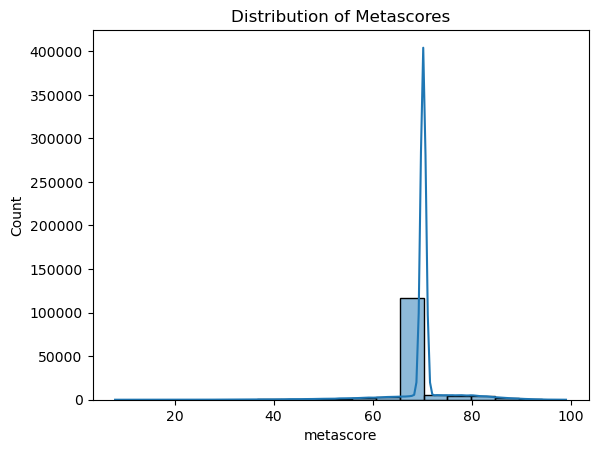

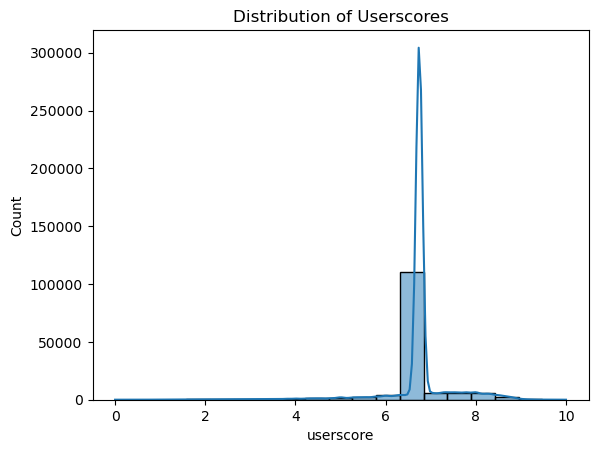

In [63]:
#histogram of the distribution of the scores
sns.histplot(df['metascore'].dropna(), kde=True)
plt.title('Distribution of Metascores')
plt.show()

sns.histplot(df['userscore'].dropna(), kde=True)
plt.title('Distribution of Userscores')
plt.show()

In [65]:
#analyzing scores by platform
platform_scores = df.groupby('platform')[['metascore', 'userscore']].mean()
print(platform_scores)

                  metascore  userscore
platform                              
3DS               68.975337   6.792843
DS                67.627853   6.801168
Dreamcast         71.847222   7.766447
Game Boy Advance  67.239806   7.166187
GameCube          69.161770   7.374997
Nintendo 64       74.871638   7.613830
PC                70.244383   6.743109
PSP               68.757254   6.965512
PlayStation       69.448843   7.399827
PlayStation 2     68.376867   7.404938
PlayStation 3     69.991472   6.714935
PlayStation 4     70.177259   6.517355
PlayStation 5     71.081032   6.659131
PlayStation Vita  70.304730   6.838959
Stadia            70.266499   6.956885
Switch            70.390025   6.770698
Wii               66.881529   6.821116
Wii U             69.161544   6.778505
Xbox              69.126941   7.127177
Xbox 360          68.791857   6.756714
Xbox One          70.478097   6.647060
Xbox Series X     71.530707   6.683541
iOS               71.458114   6.702910


In [67]:
# Conclusion 1: Distribution of Scores
print("Conclusion 1: Distribution of Scores")
print("The Metascores are concentrated around 70-80, indicating moderately high critic ratings.")
print("The Userscores are more spread out, with a peak around 6.5-7.5, suggesting lower and more varied user ratings.")
# Conclusion 2: Summary Statistics
print("\nConclusion 2: Summary Statistics")
print("The mean Metascore is 70.19, while the mean Userscore is 6.74, indicating critics rate games higher than users.")
print("The standard deviation for Metascores (5.76) is higher than for Userscores (0.79), showing more variability in critic ratings.")
print("The minimum Metascore is 8, and the minimum Userscore is 0, indicating the presence of extreme outliers.")
# Conclusion 3: Platform-wise Analysis
print("\nConclusion 3: Platform-wise Analysis")
print("Nintendo 64 has the highest average Metascore (74.87), indicating highly rated games by critics.")
print("Dreamcast has the highest average Userscore (7.77), suggesting strong user preference for games on this platform.")
print("Modern platforms like PlayStation 5 (71.08) and Xbox Series X (71.53) maintain high critic ratings.")
# Conclusion 4: General Observations
print("\nConclusion 4: General Observations")
print("Critics and users generally agree on game quality, as platforms with high Metascores also have high Userscores.")
print("However, discrepancies exist, such as PlayStation 4 having a high Metascore (70.18) but a lower Userscore (6.52).")

Conclusion 1: Distribution of Scores
The Metascores are concentrated around 70-80, indicating moderately high critic ratings.
The Userscores are more spread out, with a peak around 6.5-7.5, suggesting lower and more varied user ratings.

Conclusion 2: Summary Statistics
The mean Metascore is 70.19, while the mean Userscore is 6.74, indicating critics rate games higher than users.
The standard deviation for Metascores (5.76) is higher than for Userscores (0.79), showing more variability in critic ratings.
The minimum Metascore is 8, and the minimum Userscore is 0, indicating the presence of extreme outliers.

Conclusion 3: Platform-wise Analysis
Nintendo 64 has the highest average Metascore (74.87), indicating highly rated games by critics.
Dreamcast has the highest average Userscore (7.77), suggesting strong user preference for games on this platform.
Modern platforms like PlayStation 5 (71.08) and Xbox Series X (71.53) maintain high critic ratings.

Conclusion 4: General Observations
